In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
# DefUsersLoans_8-7-22
data=pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 13)

In [3]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [5]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [6]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:

data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:

data['Combined_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [15]:
data['Debt_Income_Ratio']=data['Combined_Income']/data['LoanAmount']


In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income,Debt_Income_Ratio
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0,39.948867
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0,47.585938
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0,41.175000
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0,42.553191


In [17]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2)

In [18]:
train.shape

(491, 13)

In [19]:
test.shape


(123, 13)

Text(0,0.5,'Loan_Status')

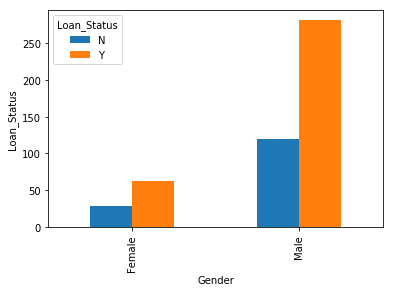

In [20]:
pd.crosstab(train.Gender,train.Loan_Status).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

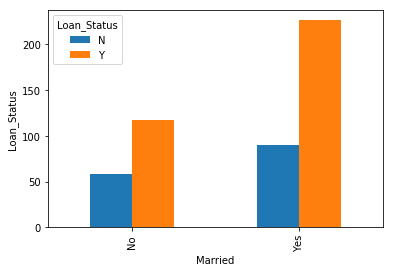

In [21]:
pd.crosstab(train.Married,train.Loan_Status).plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

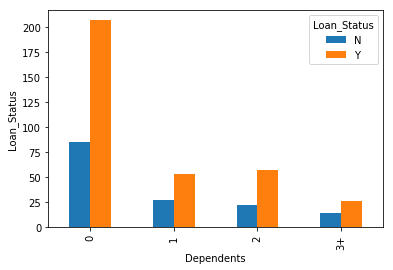

In [22]:
pd.crosstab(train.Dependents,train.Loan_Status).plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

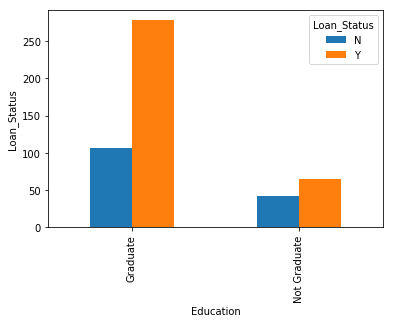

In [23]:
pd.crosstab(train.Education,train.Loan_Status).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

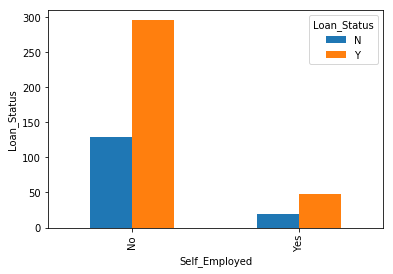

In [24]:
pd.crosstab(train.Self_Employed,train.Loan_Status).plot(kind='bar')
plt.xlabel('Self_Employed')
plt.ylabel('Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF68F75F8>,
      dtype=object)

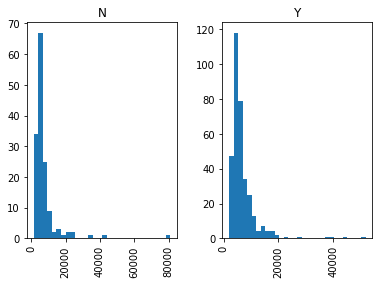

In [25]:
train.hist(column="Combined_Income",by="Loan_Status",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF64D5518>,
      dtype=object)

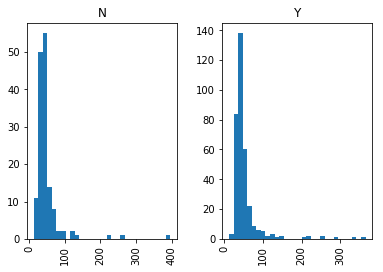

In [26]:
train.hist(column="Debt_Income_Ratio",by="Loan_Status",bins=30)

In [27]:
cols = list(train.columns.values)
cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Combined_Income',
 'Debt_Income_Ratio']

In [28]:
train = train[['Loan_ID', 'Gender', 'Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Debt_Income_Ratio','Loan_Status']]
test = test[['Loan_ID', 'Gender', 'Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Debt_Income_Ratio','Loan_Status']]


In [29]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Debt_Income_Ratio,Loan_Status
332,LP002100,Male,No,0,Graduate,No,71.0,360.0,1.0,Urban,2833.0,39.901408,Y
489,LP002556,Male,No,0,Graduate,No,75.0,360.0,1.0,Urban,2435.0,32.466667,N
253,LP001843,Male,Yes,1,Not Graduate,No,279.0,180.0,1.0,Semiurban,9762.0,34.989247,Y
55,LP001194,Male,Yes,2,Graduate,No,97.0,360.0,1.0,Semiurban,3875.0,39.948454,Y
231,LP001768,Male,Yes,0,Graduate,No,42.0,180.0,1.0,Rural,3716.0,88.476190,Y


In [30]:
train_copy=train.copy()
train_copy['Gender'] = train_copy['Gender'].map({'Male':1,'Female':0})
train_copy['Married'] = train_copy['Married'].map({'Yes':1,'No':0})
train_copy['Dependents'] = train_copy['Dependents'].map({'3+':3,'0':0, '1':1, '2':2})
train_copy['Education'] = train_copy['Education'].map({'Graduate':1,'Not Graduate':0})
train_copy['Self_Employed'] = train_copy['Self_Employed'].map({'Yes':1,'No':0})
train_copy['Property_Area'] = train_copy['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
train_copy['Loan_Status'] = train_copy['Loan_Status'].map({'Y':1,'N':0})
train_copy.head()




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Debt_Income_Ratio,Loan_Status
332,LP002100,1,0,0,1,0,71.0,360.0,1.0,2,2833.0,39.901408,1
489,LP002556,1,0,0,1,0,75.0,360.0,1.0,2,2435.0,32.466667,0
253,LP001843,1,1,1,0,0,279.0,180.0,1.0,1,9762.0,34.989247,1
55,LP001194,1,1,2,1,0,97.0,360.0,1.0,1,3875.0,39.948454,1
231,LP001768,1,1,0,1,0,42.0,180.0,1.0,0,3716.0,88.476190,1


In [31]:

test_copy=test.copy()
test_copy['Gender'] = test_copy['Gender'].map({'Male':1,'Female':0})
test_copy['Married'] = test_copy['Married'].map({'Yes':1,'No':0})
test_copy['Dependents'] = test_copy['Dependents'].map({'3+':3,'0':0, '1':1, '2':2})
test_copy['Education'] = test_copy['Education'].map({'Graduate':1,'Not Graduate':0})
test_copy['Self_Employed'] = test_copy['Self_Employed'].map({'Yes':1,'No':0})
test_copy['Property_Area'] = test_copy['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
test_copy['Loan_Status'] = test_copy['Loan_Status'].map({'Y':1,'N':0})
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Debt_Income_Ratio,Loan_Status
63,LP001213,1,1,1,1,0,146.412162,360.0,0.0,0,4945.0,33.774517,0
353,LP002142,0,1,0,1,1,105.000000,360.0,0.0,0,5500.0,52.380952,0
431,LP002379,1,0,0,1,0,105.000000,360.0,0.0,0,6500.0,61.904762,0
81,LP001266,1,1,1,1,1,146.412162,360.0,1.0,1,2395.0,16.357931,1
392,LP002263,1,1,0,1,0,120.000000,360.0,1.0,2,4698.0,39.150000,1


In [32]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_copy.iloc[:,1:12],train_copy.iloc[:,-1])


In [33]:
labels=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Debt_Income_Ratio'];
for feature in zip(labels,clf.feature_importances_):
    print(feature)

('Gender', 0.025362680464721277)
('Married', 0.0052758079382406635)
('Dependents', 0.034519106441087764)
('Education', 0.010109170459024694)
('Self_Employed', 0.00825857815653735)
('LoanAmount', 0.12416595295851343)
('Loan_Amount_Term', 0.02301902749099162)
('Credit_History', 0.3088987620001697)
('Property_Area', 0.06931698521245)
('Combined_Income', 0.2038416865003621)
('Debt_Income_Ratio', 0.18723224237790131)


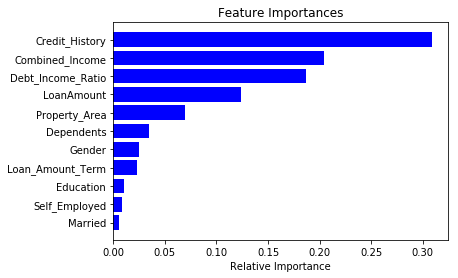

In [34]:
features = labels
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
important_train=train_copy[['Credit_History','Debt_Income_Ratio','Combined_Income','LoanAmount','Property_Area','Dependents','Married']]
important_test=test_copy[['Credit_History','Debt_Income_Ratio','Combined_Income','LoanAmount','Property_Area','Dependents','Married']]
new_clf = DecisionTreeClassifier()
new_clf.fit(important_train, train_copy.iloc[:,-1])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_pred = new_clf.predict(important_test)
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.6422764227642277

In [37]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[17, 27],
       [17, 62]], dtype=int64)

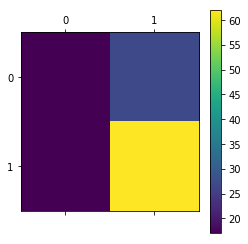

In [38]:
plt.matshow(results)
plt.colorbar()

In [39]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.6966292134831461


In [40]:
import scikitplot as skplt
y_true = test_copy.iloc[:,-1]



In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)

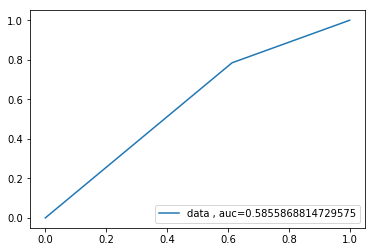

In [42]:
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(train_copy.iloc[:,1:12], train_copy.iloc[:,-1])

In [44]:
labels=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Debt_Income_Ratio'];
for feature in zip(labels,clf.feature_importances_):
    print(feature)

('Gender', 0.017816177845798288)
('Married', 0.02227707203283789)
('Dependents', 0.040798112007475545)
('Education', 0.02145126720475317)
('Self_Employed', 0.014072488561450873)
('LoanAmount', 0.1583675354121733)
('Loan_Amount_Term', 0.030435700085201786)
('Credit_History', 0.27769928208192984)
('Property_Area', 0.04609058651826909)
('Combined_Income', 0.18484017781065187)
('Debt_Income_Ratio', 0.18615160043945836)


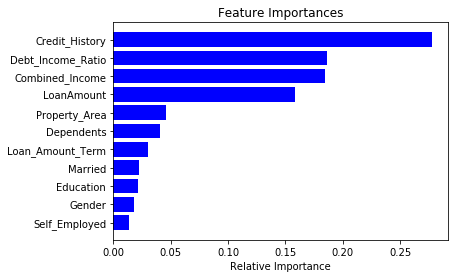

In [45]:
features = labels
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
important_train = train_copy[['Credit_History','Debt_Income_Ratio','Combined_Income','LoanAmount','Dependents','Property_Area','Loan_Amount_Term']]
important_test = test_copy[['Credit_History','Debt_Income_Ratio','Combined_Income','LoanAmount','Dependents','Property_Area','Loan_Amount_Term']]


In [47]:
new_clf = RandomForestClassifier(n_estimators=10000, random_state=0,)
new_clf.fit(important_train, train_copy.iloc[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = new_clf.predict(important_test)
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.7723577235772358

In [49]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[21, 23],
       [ 5, 74]], dtype=int64)

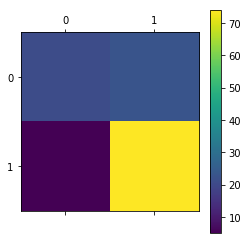

In [50]:
plt.matshow(results)
plt.colorbar()

In [51]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.7628865979381443


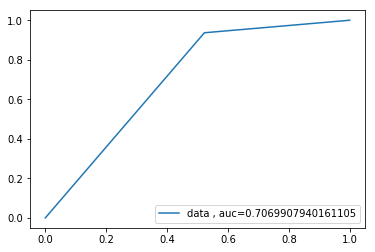

In [52]:
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
clf = svm.SVC(kernel='linear')
clf.fit(train_copy.iloc[:,1:12],train_copy.iloc[:,-1])


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_pred = clf.predict(test_copy.iloc[:,1:12])  

In [55]:
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.7560975609756098

In [56]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[16, 28],
       [ 2, 77]], dtype=int64)

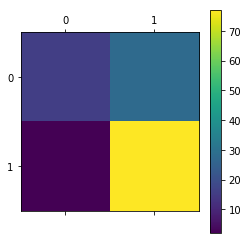

In [57]:
plt.matshow(results)
plt.colorbar()

In [58]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.7333333333333333


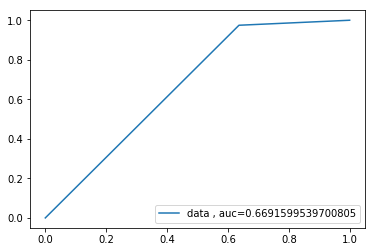

In [59]:
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()